esc, M, # comment

# Importing libraries

In [2]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')


# loading the dataset

In [3]:
df= pd.read_csv('working.csv')
df

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married
...,...,...,...,...,...,...,...,...,...
4851,4852,9297,2,42,2.0,3000,1040,4,married
4852,4853,9301,2,43,12.0,0,0,2,married
4853,4854,9302,1,37,8.0,22045,2793,98,divorced
4854,4855,9305,2,40,6.0,134,30,3,married


# DATA PREPROCESSING
## droping columns that are not required for analysis

In [4]:
df1 = df.drop(["Seq No", "intnum", "persnum"], axis=1)
df1

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced
2,33,12.0,8000,693,1,married
3,39,10.0,15000,1904,2,married
4,47,9.0,6500,1683,5,married
...,...,...,...,...,...,...
4851,42,2.0,3000,1040,4,married
4852,43,12.0,0,0,2,married
4853,37,8.0,22045,2793,98,divorced
4854,40,6.0,134,30,3,married


# Rename column

In [5]:
df1=df1.rename({'educatn':'education'},axis=1)

# knowing the statistics of dataset

In [6]:
df1.describe()

,age,education,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


# finding null values

In [7]:
df.isnull().sum()

Seq No      0
intnum      0
persnum     0
age         0
educatn     1
earnings    0
hours       0
kids        0
married     0
dtype: int64

# Filling Null values

In [8]:
#
df1['education'] = df1['education'].fillna(df1['education'].mean())

In [9]:
#
df1.isnull().sum()

age          0
education    0
earnings     0
hours        0
kids         0
married      0
dtype: int64

# Exploratory data analysis

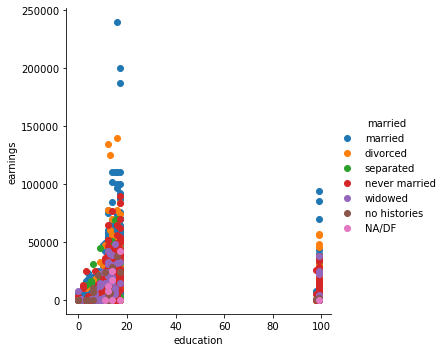

In [10]:
#Scatter plot
sns.FacetGrid(df1,hue="married",size=5).map(plt.scatter,"education","earnings").add_legend()

# Observation: Married people earning more and we found outliers at range of 100

# Finding outliers

<AxesSubplot:xlabel='age', ylabel='education'>

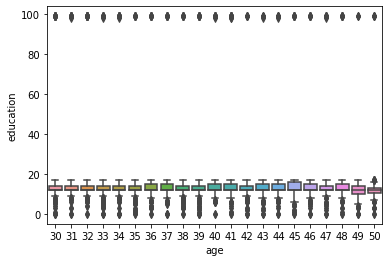

In [11]:
sns.boxplot(x='age',y='education',data=df1)

obeservation: education feature, outlier at range in 100

<AxesSubplot:xlabel='kids'>

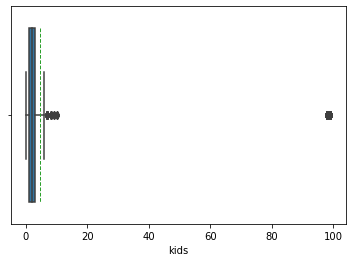

In [12]:
sns.boxplot(x=df1['kids'],showmeans=True,meanline=True)

observation: kids feature, outlier at range in 100

<AxesSubplot:xlabel='age', ylabel='earnings'>

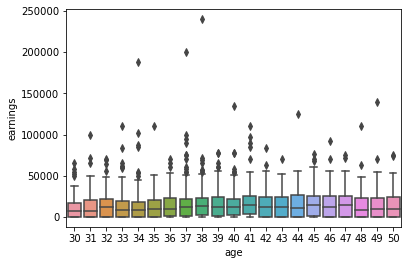

In [13]:
sns.boxplot(x='age',y='earnings',data=df1)

obeservation: age feature, outlier at range of >15000

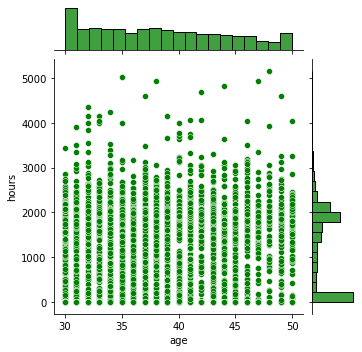

In [14]:
sns.jointplot(x="age",y="hours",data=df1,size=5,color='green')

observation: Hours feature, outlier at Hours=0

# Remove outliers ( kids >=20 and education >= 20 and earnings >= 150000 and Hours=0)

Text(0.5, 0, 'Level of Education')

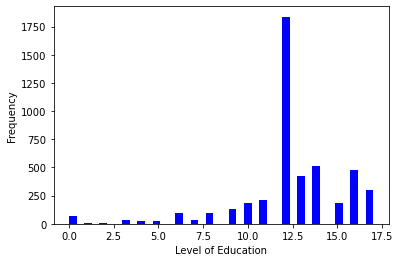

In [15]:
df1 = df1.drop(df1[df1.education > 20].index)
df1['education'].plot(kind='hist', bins=40,color='blue')
plt.xlabel('Level of Education')

Text(0.5, 0, 'Number Of Kids')

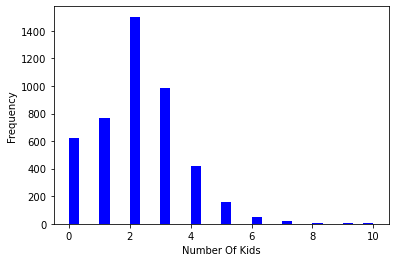

In [16]:
df1 = df1.drop(df1[df1.kids > 20].index)
df1['kids'].plot(kind='hist', bins=30,color='blue')
plt.xlabel('Number Of Kids')

Text(0.5, 0, 'earnings')

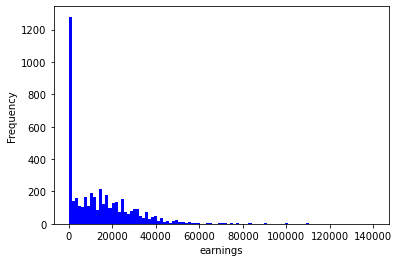

In [17]:
df1 = df1.drop(df1[df1.earnings > 150000].index)

df1['earnings'].plot(kind='hist', bins=100,color='blue')
plt.xlabel('earnings')

Text(0.5, 0, 'Hours')

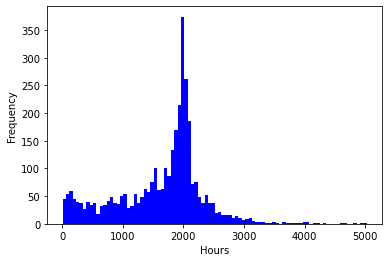

In [18]:

df1 = df1.drop(df1[df1.hours == 0].index)
df1['hours'].plot(kind='hist', bins=90,color='blue')
plt.xlabel('Hours')

# correlation between the features using Pearson's Correlation Coefficient

In [19]:
df1.corr(method='pearson')

,age,education,earnings,hours,kids
age,1.000000,-0.011651,0.114818,0.060164,0.155162
education,-0.011651,1.000000,0.387013,0.076206,-0.279871
earnings,0.114818,0.387013,1.000000,0.466571,-0.241607
hours,0.060164,0.076206,0.466571,1.000000,-0.116544
kids,0.155162,-0.279871,-0.241607,-0.116544,1.000000


 ## strong correlation is found in between Education & Earning, Hours & Earning

Index(['education', 'earnings', 'hours', 'kids'], dtype='object')


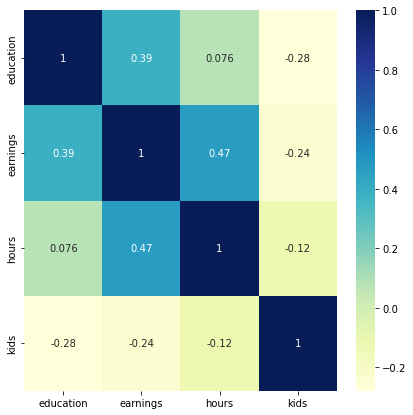

In [20]:
corrmap = df1.corr(method='pearson')
earningfeatures = corrmap.index[abs(corrmap['earnings']) >= 0.2]
print(earningfeatures)

plt.figure(figsize=(7,7))
ax = sns.heatmap(df1[earningfeatures].corr(), annot=True, cmap="YlGnBu")

In [21]:
v1, p = stat.normaltest(df1['hours'].sample(50))
print(v1, p)
if p >= 0.05:
    print('Hours are normally distributed.')
else:
    print('Hours not normally distributed.')

11.23319548635125 0.003636994070973471
Hours not normally distributed.


In [22]:
samplingSize = 1500
hypothesisVal = df1.earnings.median()
print(hypothesisVal)



16000.0


In [23]:
Hours_high_salary = df1[df1.earnings> hypothesisVal].hours.sample(samplingSize).sort_values()
Hours_high_salary.describe()

count    1500.000000
mean     1941.248667
std       506.881882
min       122.000000
25%      1788.000000
50%      1960.000000
75%      2100.000000
max      4821.000000
Name: hours, dtype: float64

In [24]:
Hours_low_salary = df1[df1.earnings<= hypothesisVal].hours.sample(samplingSize).sort_values()
Hours_low_salary.describe()

count    1500.000000
mean     1330.674000
std       764.847193
min         6.000000
25%       720.000000
50%      1425.500000
75%      1960.000000
max      5025.000000
Name: hours, dtype: float64

In [25]:
import matplotlib.colors as mcolors

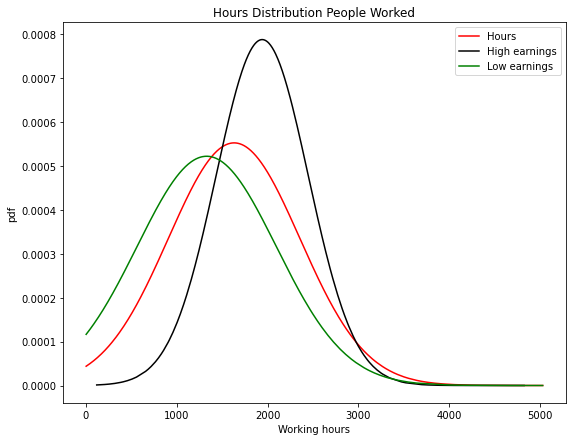

In [26]:
obs = df1['hours'].sort_values();
obsHours = stat.norm.pdf(obs, obs.mean(), obs.std())
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(obs, obsHours, label='Hours',color='red')

data_hours1 = stat.norm.pdf(Hours_high_salary, Hours_high_salary.mean(), Hours_high_salary.std())
ax.plot(Hours_high_salary, data_hours1, label='High earnings',color='black')

data_hours2 = stat.norm.pdf(Hours_low_salary, Hours_low_salary.mean(), Hours_low_salary.std())
ax.plot(Hours_low_salary, data_hours2, label='Low earnings',color='green')

plt.title('Hours Distribution People Worked')
plt.xlabel('Working hours')
plt.ylabel('pdf')
plt.legend()

Hypothesis Testing : 
Ha = People who earn high salary work more hours, 
Assumption
H0 = People with high or low salaries work the same number of hours



In [27]:
statistics, p_test1 = stat.ttest_ind(Hours_high_salary, Hours_low_salary)
print('Statistics=%.4f, p=%.4f' % (statistics, p_test1))
value = 0.05  # 5% area under the normal graph
if p > value:
    print('People with different range of incomes work same number of hours. Hence, fail to reject H0)')
else:
    print('People who get high salary work more hours, so reject H0')

Statistics=25.7720, p=0.0000
People who get high salary work more hours, so reject H0


since we got p=0.00 so we reject the null hypothesis